In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_price.csv')

In [3]:
df.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
df.normalized_losses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [6]:
df_cat = df.select_dtypes(include='O')

In [7]:
df_cat

,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,body_style,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
0,?,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi,3.19,3.4,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,gas,std,four,sedan,rwd,front,volvo,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,gas,turbo,four,sedan,rwd,front,volvo,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,gas,std,four,sedan,rwd,front,volvo,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,diesel,turbo,four,sedan,rwd,front,volvo,ohc,six,idi,3.01,3.4,106,4800,22470


In [8]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [9]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [10]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [11]:
df['peak_rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [12]:
df['price'].value_counts()

price
?        4
16500    2
6229     2
7609     2
7957     2
        ..
16845    1
19045    1
21485    1
22470    1
22625    1
Name: count, Length: 187, dtype: int64

In [13]:
# Where the target value is null. According to me, the records aren't meaningful so removing the '?' records in price

In [14]:
df[df['price'] == '?'].index

Index([9, 44, 45, 129], dtype='int64')

In [15]:
indexs = df[df['price'] == '?'].index
indexs

Index([9, 44, 45, 129], dtype='int64')

In [16]:
df = df.drop(indexs,axis=0)

In [17]:
df[df['price'] == '?'].index

Index([], dtype='int64')

In [18]:
df[df['stroke'] == '?']

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [19]:
df['stroke'] = pd.to_numeric(df['stroke'].replace('?', np.nan), errors='coerce')
df['bore'] = pd.to_numeric(df['bore'].replace('?', np.nan), errors='coerce')

In [20]:
df

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,volvo,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [21]:
df[df.bore.isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,gas,std,two,hatchback,rwd,front,95.3,mazda,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [22]:
df_cat = df.select_dtypes(include='O')

In [23]:
df_cat

,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,body_style,engine_type,num_of_cylinders,fuel_system,horsepower,peak_rpm,price
0,?,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,111,5000,13495
1,?,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,111,5000,16500
2,?,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi,154,5000,16500
3,164,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi,102,5500,13950
4,164,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,gas,std,four,sedan,rwd,front,volvo,ohc,four,mpfi,114,5400,16845
201,95,gas,turbo,four,sedan,rwd,front,volvo,ohc,four,mpfi,160,5300,19045
202,95,gas,std,four,sedan,rwd,front,volvo,ohcv,six,mpfi,134,5500,21485
203,95,diesel,turbo,four,sedan,rwd,front,volvo,ohc,six,idi,106,4800,22470


In [24]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

In [25]:
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'],errors='coerce')

In [26]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [27]:
df['normalized_losses'] = pd.to_numeric(df['normalized_losses'],errors='coerce')

In [28]:
df_cat = df.select_dtypes(include='O')

In [29]:
df_cat

,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,body_style,engine_type,num_of_cylinders,fuel_system
0,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,volvo,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,volvo,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,volvo,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,volvo,ohc,six,idi


In [30]:
df['fuel_system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [31]:
df['Fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [32]:
df['make'].unique()

array(['std', 'turbo'], dtype=object)

In [33]:
df['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [34]:
df['num_of_doors'] = df['num_of_doors'].replace('?',np.nan)

In [35]:
df['aspiration'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [36]:
df['wheel_base'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [37]:
df['engine_location'].unique()

array(['front', 'rear'], dtype=object)

In [38]:
df['body_style'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [39]:
df['engine_type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [40]:
df['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
df.isnull().sum()

symboling             0
normalized_losses    37
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [42]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

num_of_doors          2
horsepower            2
peak_rpm              2
bore                  4
stroke                4
normalized_losses    37
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   Fuel_type          201 non-null    object 
 3   make               201 non-null    object 
 4   num_of_doors       199 non-null    object 
 5   aspiration         201 non-null    object 
 6   wheel_base         201 non-null    object 
 7   engine_location    201 non-null    object 
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    object 
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non-null

In [44]:
df.describe()

,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
df.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [46]:
df['normalized_losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized_losses, Length: 201, dtype: float64

<Axes: xlabel='normalized_losses'>

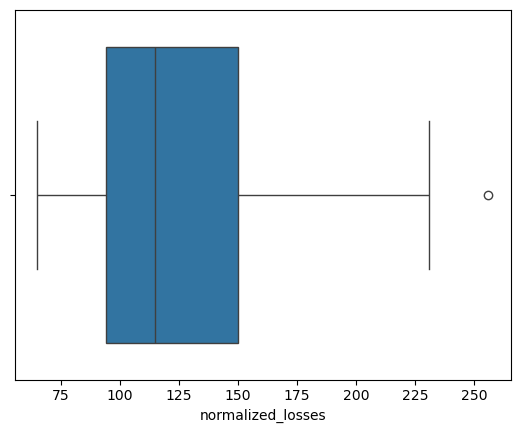

In [47]:
sns.boxplot(x='normalized_losses',data=df)

<Axes: xlabel='curb_weight'>

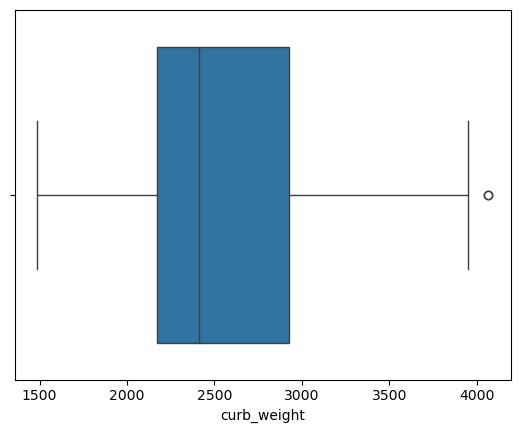

In [48]:
sns.boxplot(x='curb_weight',data=df)

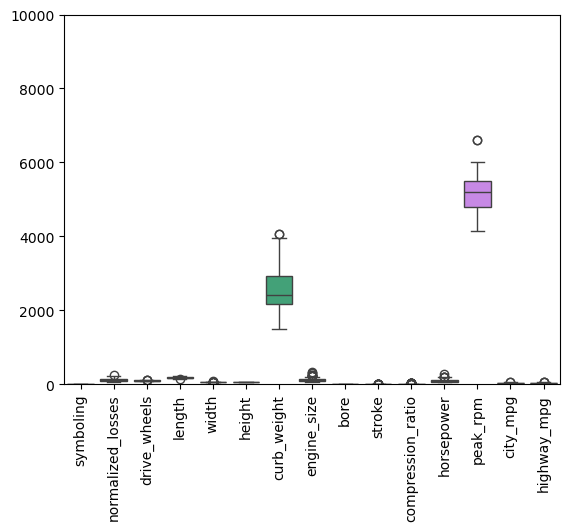

In [49]:
sns.boxplot(data=df.drop('price',axis=1))
plt.xticks(rotation=90)
plt.ylim(0,10000);

In [50]:
# According to graph, there are only 1% or 2% outliers for each column, no need of removing

<Axes: xlabel='horsepower'>

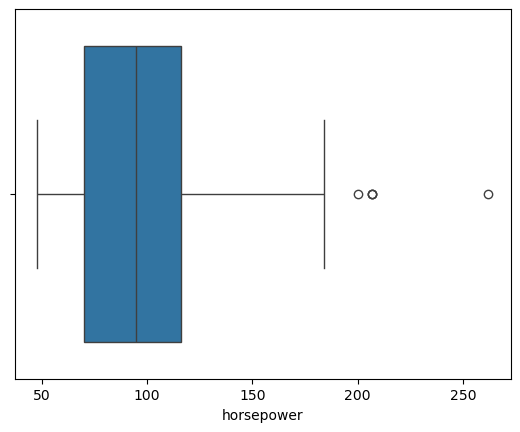

In [51]:
sns.boxplot(x='horsepower',data=df)

<Axes: xlabel='engine_size'>

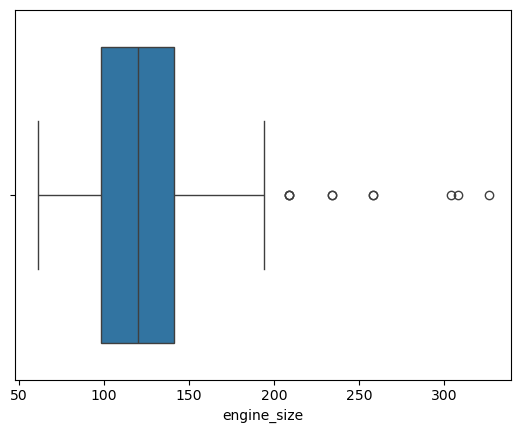

In [52]:
sns.boxplot(x='engine_size',data=df)

In [53]:
df['engine_size'].describe()

count    201.000000
mean     126.875622
std       41.546834
min       61.000000
25%       98.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [54]:
iqr = 141 - 98
ma = 141 + (iqr*1.5)

In [55]:
df[df['engine_size'] > ma]['engine_size']

15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: engine_size, dtype: int64

In [56]:
len(df[df['engine_size'] > ma]['engine_size'])/len(df['engine_size'])

0.04975124378109453

In [57]:
#  only 5% outlier so no worry of removing just focus on whether to change the null values to mean/median

In [58]:
c = df['normalized_losses'].mean()

In [59]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

num_of_doors          2
horsepower            2
peak_rpm              2
bore                  4
stroke                4
normalized_losses    37
dtype: int64

In [60]:
df[df['num_of_doors'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,gas,turbo,NaN,sedan,fwd,front,93.7,dodge,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
63,0,NaN,diesel,std,NaN,sedan,fwd,front,98.8,mazda,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


In [61]:
df['num_of_doors'].mode()

0    four
Name: num_of_doors, dtype: object

In [62]:
df.iloc[26]

symboling                 1
normalized_losses     148.0
Fuel_type               gas
make                  turbo
num_of_doors            NaN
aspiration            sedan
wheel_base              fwd
engine_location       front
drive_wheels           93.7
body_style            dodge
length                157.3
width                  63.8
height                 50.6
curb_weight            2191
engine_type             ohc
num_of_cylinders       four
engine_size              98
fuel_system            mpfi
bore                   3.03
stroke                 3.39
compression_ratio       7.6
horsepower            102.0
peak_rpm             5500.0
city_mpg                 24
highway_mpg              30
price                  8558
Name: 27, dtype: object

In [63]:
# Here filling the missing value of the 'num_of_doors' column, rather tha using mode(), is it better to mention them 'unknown'?
# since here only two values are empty I amgoing with convetioncal method of filling with the mode.

In [64]:
c = df['num_of_doors'].mode()[0]
c

'four'

In [65]:
df['num_of_doors'] = df['num_of_doors'].fillna(c)

In [66]:
df.iloc[26]

symboling                 1
normalized_losses     148.0
Fuel_type               gas
make                  turbo
num_of_doors           four
aspiration            sedan
wheel_base              fwd
engine_location       front
drive_wheels           93.7
body_style            dodge
length                157.3
width                  63.8
height                 50.6
curb_weight            2191
engine_type             ohc
num_of_cylinders       four
engine_size              98
fuel_system            mpfi
bore                   3.03
stroke                 3.39
compression_ratio       7.6
horsepower            102.0
peak_rpm             5500.0
city_mpg                 24
highway_mpg              30
price                  8558
Name: 27, dtype: object

In [67]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

horsepower            2
peak_rpm              2
stroke                4
bore                  4
normalized_losses    37
dtype: int64

In [68]:
df[df['horsepower'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,gas,std,four,wagon,fwd,front,96.1,renault,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,NaN,gas,std,two,hatchback,fwd,front,96.1,renault,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


<Axes: xlabel='horsepower'>

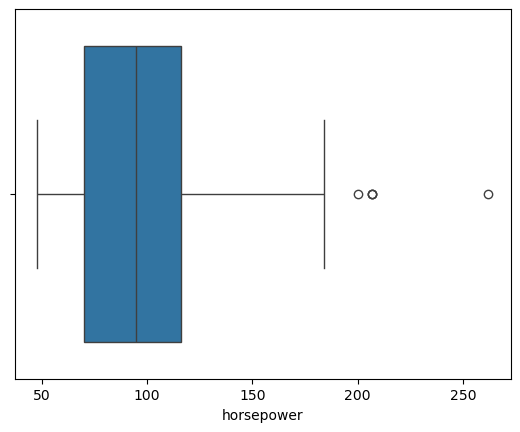

In [69]:
sns.boxplot(x='horsepower',data=df)

In [70]:
# time to decide between mean and median

In [71]:
df['horsepower'].mean()

np.float64(103.39698492462311)

In [72]:
df['horsepower'].median()

95.0

In [73]:
df['horsepower'].skew()

np.float64(1.1415842841631443)

<Axes: xlabel='horsepower', ylabel='Count'>

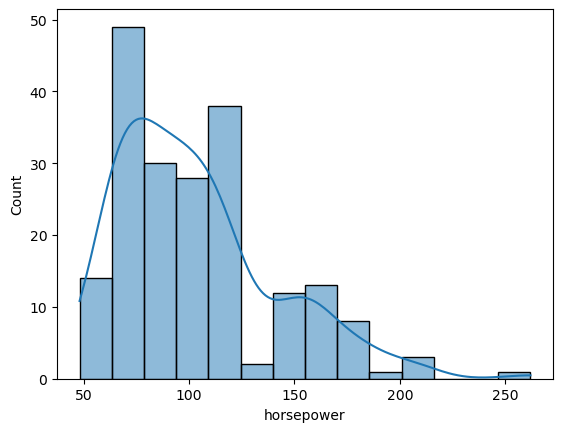

In [74]:
sns.histplot(x='horsepower',data=df,kde=True)

In [75]:
# The distribution is skewed, so we will use median to fill na values

In [76]:
c = df['horsepower'].median()

In [77]:
df['horsepower'] = df['horsepower'].fillna(c)

In [78]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

peak_rpm              2
bore                  4
stroke                4
normalized_losses    37
dtype: int64

In [79]:
df[df['peak_rpm'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,gas,std,four,wagon,fwd,front,96.1,renault,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9295
131,2,NaN,gas,std,two,hatchback,fwd,front,96.1,renault,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9895


In [80]:
df['peak_rpm'].mean()

np.float64(5117.587939698493)

In [81]:
df['peak_rpm'].median()

5200.0

In [82]:
# not much diff

<Axes: xlabel='peak_rpm'>

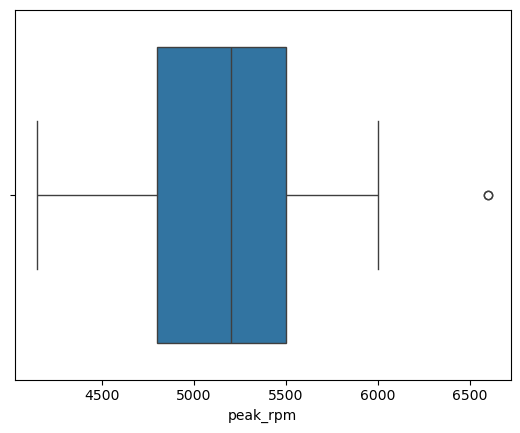

In [83]:
sns.boxplot(x='peak_rpm',data=df)

In [84]:
# single outlier and now checking the skewness

In [85]:
df['peak_rpm'].skew()

np.float64(0.10772928657030856)

<Axes: xlabel='peak_rpm', ylabel='Count'>

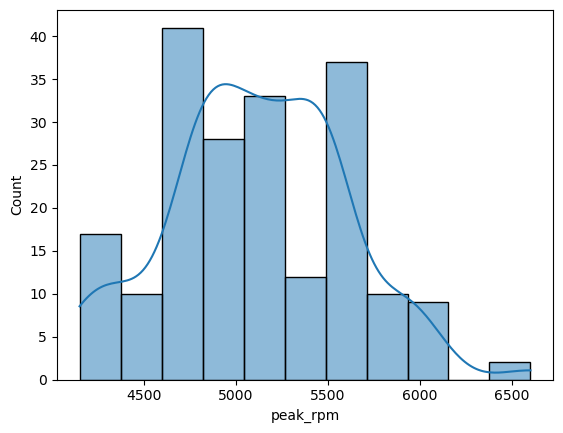

In [86]:
sns.histplot(x='peak_rpm',data=df,kde=True)

In [87]:
# Good distribution and no left/right skewness, so mean it is.

In [88]:
c = df['peak_rpm'].mean()

In [89]:
df['peak_rpm'] = df['peak_rpm'].fillna(c)

In [90]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

bore                  4
stroke                4
normalized_losses    37
dtype: int64

In [91]:
df[df['bore'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
56,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
57,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
58,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


In [92]:
df['bore'].mean()

np.float64(3.330710659898477)

In [93]:
df['bore'].median()

3.31

In [94]:
# no much diff, but checking plots

<Axes: xlabel='bore'>

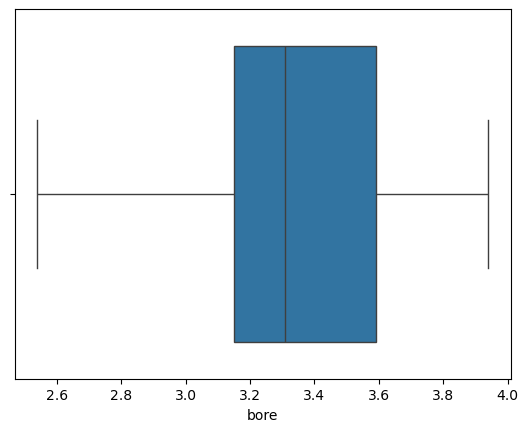

In [95]:
sns.boxplot(x='bore',data=df)

In [96]:
# no outliers, mean it is

In [97]:
c = df['bore'].mean().round(2)

In [98]:
df['bore'] = df['bore'].fillna(c)

In [99]:
df[df['stroke'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,3.33,NaN,9.4,101.0,6000.0,17,23,10945
56,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,3.33,NaN,9.4,101.0,6000.0,17,23,11845
57,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,70,4bbl,3.33,NaN,9.4,101.0,6000.0,17,23,13645
58,3,150.0,gas,std,two,hatchback,rwd,front,95.3,mazda,...,80,mpfi,3.33,NaN,9.4,135.0,6000.0,16,23,15645


In [100]:
df['stroke'].median()

3.29

In [101]:
df['stroke'].mean().round(2)

np.float64(3.26)

In [102]:
df['stroke'].skew()

np.float64(-0.6937783864438527)

<Axes: xlabel='stroke'>

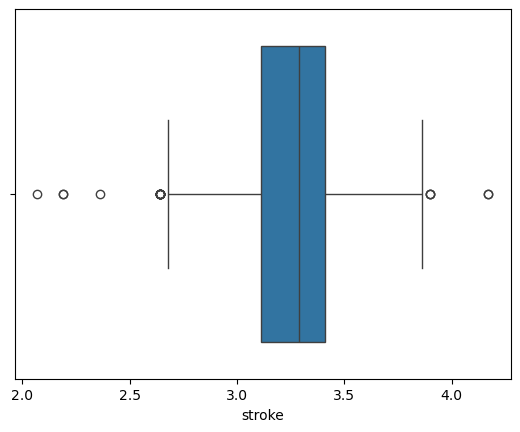

In [103]:
sns.boxplot(x='stroke',data=df)

In [104]:
# column 'stroke' contains outliers with great distribution, here median is used

In [105]:
c = df['stroke'].median()

In [106]:
df['stroke'] = df['stroke'].fillna(c)

In [107]:
# Last column with na values

In [108]:
len(df[df['normalized_losses'].isnull()])

37

In [109]:
df[df['normalized_losses'].isnull()]

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.00000,21,27,13495
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.00000,21,27,16500
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.00000,19,26,16500
5,2,NaN,gas,std,two,sedan,fwd,front,99.8,audi,...,136,mpfi,3.19,3.40,8.5,110.0,5500.00000,19,25,15250
7,1,NaN,gas,std,four,wagon,fwd,front,105.8,audi,...,136,mpfi,3.19,3.40,8.5,110.0,5500.00000,19,25,18920
14,1,NaN,gas,std,four,sedan,rwd,front,103.5,bmw,...,164,mpfi,3.31,3.19,9.0,121.0,4250.00000,20,25,24565
15,0,NaN,gas,std,four,sedan,rwd,front,103.5,bmw,...,209,mpfi,3.62,3.39,8.0,182.0,5400.00000,16,22,30760
16,0,NaN,gas,std,two,sedan,rwd,front,103.5,bmw,...,209,mpfi,3.62,3.39,8.0,182.0,5400.00000,16,22,41315
17,0,NaN,gas,std,four,sedan,rwd,front,110.0,bmw,...,209,mpfi,3.62,3.39,8.0,182.0,5400.00000,15,20,36880
43,0,NaN,gas,std,four,sedan,rwd,front,94.3,isuzu,...,111,2bbl,3.31,3.23,8.5,78.0,4800.00000,24,29,6785


In [110]:
df['normalized_losses'].median()

115.0

In [111]:
df['normalized_losses'].mean()

np.float64(122.0)

In [112]:
df['normalized_losses'].skew()

np.float64(0.7659764175950632)

<Axes: xlabel='normalized_losses'>

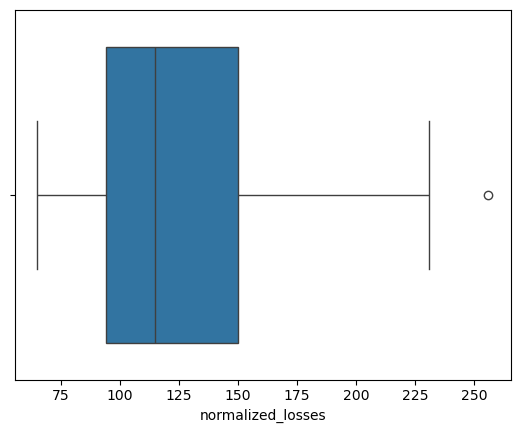

In [113]:
sns.boxplot(x='normalized_losses',data=df)

<Axes: xlabel='normalized_losses', ylabel='Count'>

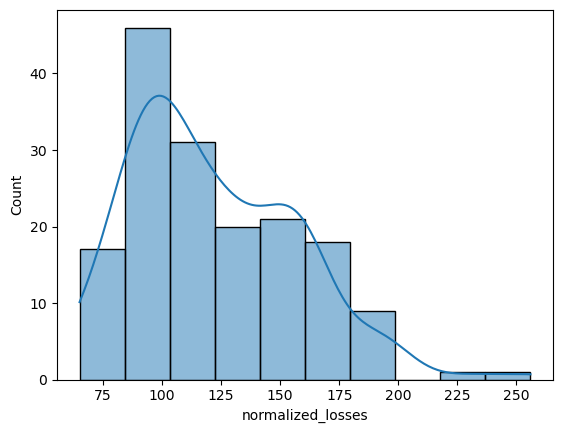

In [114]:
sns.histplot(x='normalized_losses',data=df,kde=True)

In [115]:
# It looks kinda skewed but the skewness btw -1 and 1 so, and also only one outlier,
# fill na with mean value

In [116]:
len(df)

201

In [117]:
df['normalized_losses'] = df.groupby('make')['normalized_losses']\
              .transform(lambda x: x.fillna(x.median()))


In [118]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [119]:
df

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,volvo,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,volvo,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [120]:
df.to_csv('Car_Price_Cleaned.csv')

In [121]:
#  Need to label encode the categories

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
le = LabelEncoder()

In [126]:
df_encoded = pd.get_dummies(df,dtype=int)

In [128]:
df_encoded

,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,...,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [129]:
df_encoded.to_csv('Car_Price_Cleaned&Encoded.csv')